In [8]:
import matplotlib.pyplot as plt

def add_dot(ax, start, end):
    global added
    if not added:
        added = True
        ax.plot(start[0] + ((end[0]-start[0])/2), start[1] + ((end[1]-start[1])/2), color="blue", marker='o', label='node')
    else:
        ax.plot(start[0] + ((end[0]-start[0])/2), start[1] + ((end[1]-start[1])/2), color="blue", marker='o')

def make_box(ax, start, end, dot=True):
    ax.plot([start[0], start[0]], [start[1], end[1]], color="orange")
    ax.plot([start[0], end[0]], [start[1], start[1]], color="orange")
    ax.plot([end[0], end[0]], [start[1], end[1]], color="orange")
    ax.plot([start[0], end[0]], [end[1], end[1]], color="orange")
    ax.fill_between([start[0], end[0]], [end[1], end[1]], [start[1], start[1]], color='#eeeeee')
    if dot: add_dot(ax, start, end)
        
def line_between(ax, start, end, label=None):
    if label:
        ax.plot([start[0], end[0]], [start[1], end[1]], linestyle='dashed', label=label, color='purple')
    else:
        ax.plot([start[0], end[0]], [start[1], end[1]], linestyle='dashed', color='purple')

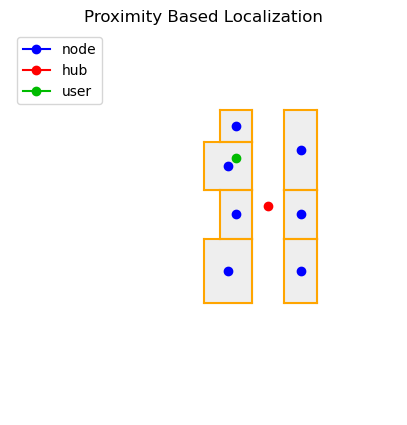

In [33]:
_, ax = plt.subplots()

ax.set_xlim(0, 100)
ax.set_ylim(0, 100)

added = False
make_box(ax, (55, 75), (65, 85))
make_box(ax, (50, 60), (65, 75))
make_box(ax, (85, 60), (75, 85))
make_box(ax, (55, 45), (65, 60))
make_box(ax, (85, 45), (75, 60))
make_box(ax, (50, 25), (65, 45))
make_box(ax, (85, 25), (75, 45))

ax.plot(70, 55, marker='o', color='red', label='hub')
ax.plot(60, 70, marker='o', color='#00BB00', label='user')

ax.legend(loc='upper left')

ax.set_title("Proximity Based Localization")


plt.axis('off')

ax.figure.set_figwidth(5)
ax.figure.set_figheight(5)

plt.savefig("/tmp/proximity.pdf")

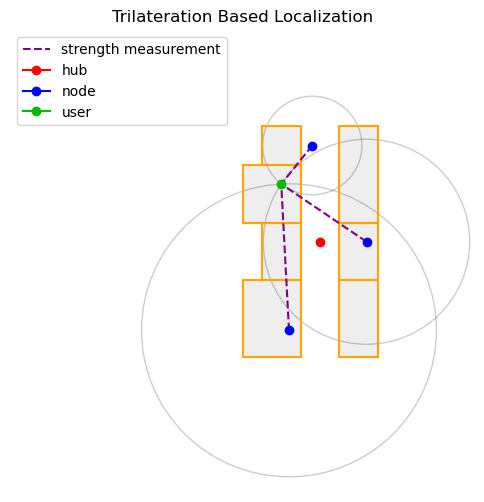

In [28]:
import math


_, ax = plt.subplots()

ax:plt.Axes

ax.set_xlim(-10, 110)
ax.set_ylim(-10, 110)

make_box(ax, (55, 75), (65, 85), dot=False)
make_box(ax, (50, 60), (65, 75), dot=False)
make_box(ax, (85, 60), (75, 85), dot=False)
make_box(ax, (55, 45), (65, 60), dot=False)
make_box(ax, (85, 45), (75, 60), dot=False)
make_box(ax, (50, 25), (65, 45), dot=False)
make_box(ax, (85, 25), (75, 45), dot=False)

line_between(ax, (62, 32), (60, 70), 'strength measurement')
line_between(ax, (82, 55), (60, 70))
line_between(ax, (68, 80), (60, 70))

circle1 = plt.Circle((62, 32), math.sqrt(pow(62 - 60, 2) + pow(32 - 70, 2)), color="#00000033", fill=False)
circle2 = plt.Circle((82, 55), math.sqrt(pow(82 - 60, 2) + pow(55 - 70, 2)), color="#00000033", fill=False)
circle3 = plt.Circle((68, 80), math.sqrt(pow(68 - 60, 2) + pow(80 - 70, 2)), color="#00000033", fill=False)

ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)

ax.plot(70, 55, marker='o', color='red', label='hub')
ax.plot(62, 32, marker='o', label='node', color='blue')
ax.plot(82, 55, marker='o', color='blue')
ax.plot(68, 80, marker='o', color='blue')
ax.plot(60, 70, marker='o', color='#00BB00', label='user')

ax.legend(loc='upper left')

ax.set_title("Trilateration Based Localization")

plt.axis('off')

ax.figure.set_figwidth(6)
ax.figure.set_figheight(6)

plt.savefig("/tmp/triangulation.pdf")

PA: [1. 1.]
PB: [2. 1.]
PC: [1. 2.]
DA: 0.5
DB: 0.5
DC: 0.5
[1.5 0. ]


(0.95, 2.05, -0.1, 2.1)

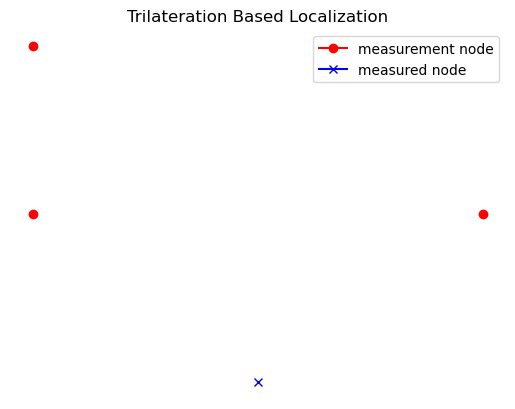

In [6]:
import matplotlib.pyplot as plt
import math
import sympy as sp
import numpy as np

_,ax = plt.subplots()

ax:plt.Axes

ax.set_title("Trilateration Based Localization")

nodes = {
    'srcs':[
        (1,1),
        (2,1),
        (1,2)
    ],
    'dst':[.5,.5,.5]
}
srclabel = False
for node in nodes['srcs']:
    if not srclabel:
        srclabel = True
        ax.plot(node[0], node[1], marker='o', color='red', label='measurement node')
    else:
        ax.plot(node[0], node[1], marker='o', color='red')

# calculate trilateration
PA = np.array(nodes['srcs'][0], dtype=np.float64)
PB = np.array(nodes['srcs'][1], dtype=np.float64)
PC = np.array(nodes['srcs'][2], dtype=np.float64)
DA = nodes['dst'][0]
DB = nodes['dst'][1]
DC = nodes['dst'][2]

print(f'PA: {PA}')
print(f'PB: {PB}')
print(f'PC: {PC}')

print(f'DA: {DA}')
print(f'DB: {DB}')
print(f'DC: {DC}')


P = np.cross(np.linalg.inv(np.array([
    [(2 * PA[0]) - (2 * PC[0]), (2 * PA[1]) - (2 * PC[1])],
    [(2 * PB[0]) - (2 * PC[0]), (2 * PB[1]) - (2 * PC[1])]])), [
        (np.power(PA[0], 2)) - (np.power(PC[0], 2)) + (np.power(PA[1], 2)) - (np.power(PC[1], 2)) + (np.power(DC, 2)) - (np.power(DA, 2)),
        (np.power(PB[0], 2)) - (np.power(PC[0], 2)) + (np.power(PB[1], 2)) - (np.power(PC[1], 2)) + (np.power(DC, 2)) - (np.power(DB, 2)) 
    ])

print(P)

ax.plot(P[0], P[1], marker='x', color='blue', label='measured node')


ax.legend(loc="best")

ax.axis('off')